# Proyek Predictive Analytics: Heart Failure
- **Nama:** Syahran Fadhil Dafanindra
- **Email:** fadhilrafa1@gmail.com
- **ID Dicoding:** syahran_fadhil_d

# Import Library

In [1]:
# Library untuk pengolahan data
import numpy as np
import pandas as pd

# Library untuk visualisasi
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Library untuk pre-processing dan splitting data
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Library untuk pemodelan dan evaluasi
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Data Loading

## Download dataset dari kaggle

In [2]:
!kaggle datasets download -d fedesoriano/heart-failure-prediction

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0
  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 6.04MB/s]


## Ekstrak dataset zip yang sudah didownload

In [3]:
!unzip heart-failure-prediction.zip

Archive:  heart-failure-prediction.zip
  inflating: heart.csv               


## Memuat data dari file csv ke dataframe

In [4]:
hearts = pd.read_csv('heart.csv')

# Data Understanding
1. Age: usia pasien [tahun]
2. Sex: jenis kelamin pasien [M: Male, F: Female]
3. ChestPainType: tipe nyeri dada:
   - TA: Typical Angina
   - ATA: Atypical Angina
   - NAP: Non-Anginal Pain
   - ASY: Asymptomatic
4. RestingBP: tekanan darah istirahat [mm Hg]
5. Cholesterol: kolesterol serum [mm/dl]
6. FastingBS: gula darah puasa [1: jika FastingBS > 120 mg/dl, 0: sebaliknya]
7. RestingECG: hasil elektrokardiogram istirahat:
   - Normal: Normal
   - ST: memiliki kelainan gelombang ST-T
   - LVH: menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri
8. MaxHR: detak jantung maksimum yang dicapai [Numeric value between 60 and 202]
9. ExerciseAngina: angina yang diinduksi oleh olahraga [Y: Yes, N: No]
10. Oldpeak: depresi ST yang diinduksi oleh olahraga relatif terhadap istirahat [Numeric value measured in depression]
11. ST_Slope: kemiringan segmen ST latihan puncak:
    - Up: upsloping
    - Flat: flat
    - Down: downsloping
12. HeartDisease: kelas output [1: heart disease, 0: Normal]

In [5]:
# menampilkan 5 baris pertama dalam dataframe
hearts.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
# menampilkan struktur dari setiap fitur di dataframe
hearts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
# menampilkan gambaran umum untuk fitur numerik
hearts.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
# mengecek missing value dari dataframe
hearts.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [9]:
# memisahkan antara fitur numerik dengan categorical/object
numerical_feature = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_feature = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

## Visualisasi Categorical Features


Feature: Sex
     jumlah sampel  persentase
Sex                           
M              725        79.0
F              193        21.0


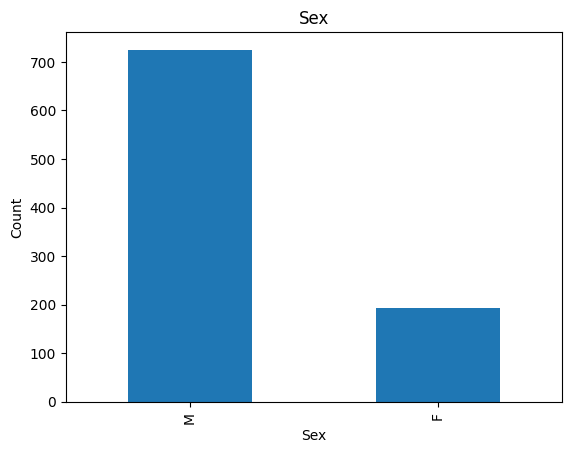


Feature: ChestPainType
               jumlah sampel  persentase
ChestPainType                           
ASY                      496        54.0
NAP                      203        22.1
ATA                      173        18.8
TA                        46         5.0


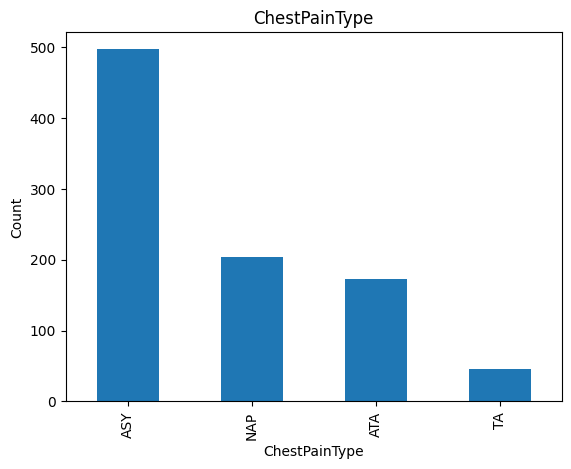


Feature: FastingBS
           jumlah sampel  persentase
FastingBS                           
0                    704        76.7
1                    214        23.3


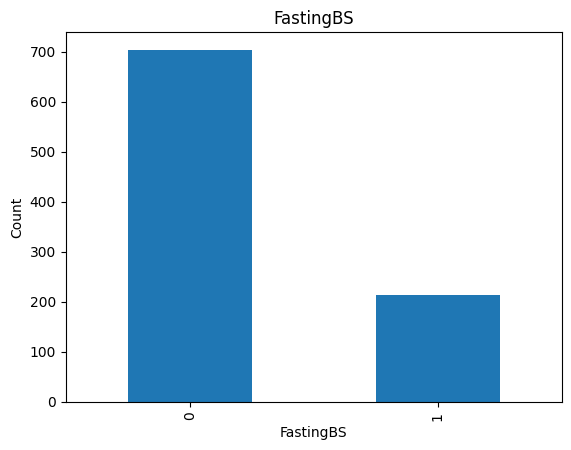


Feature: RestingECG
            jumlah sampel  persentase
RestingECG                           
Normal                552        60.1
LVH                   188        20.5
ST                    178        19.4


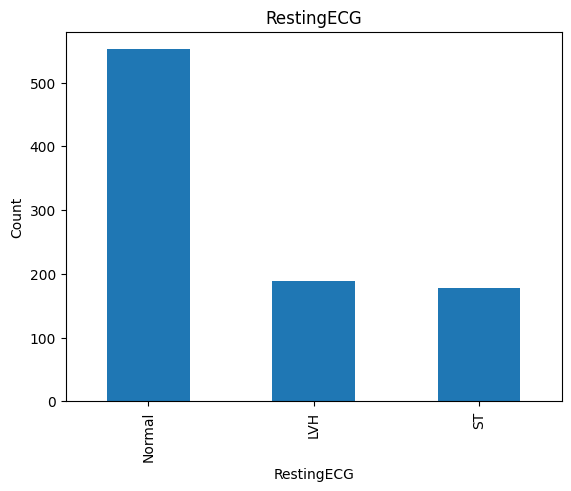


Feature: ExerciseAngina
                jumlah sampel  persentase
ExerciseAngina                           
N                         547        59.6
Y                         371        40.4


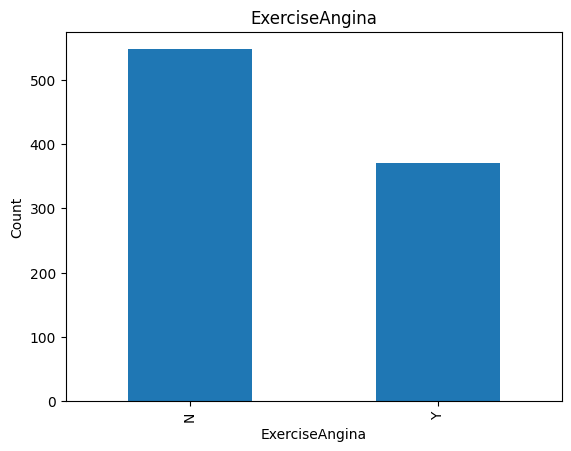


Feature: ST_Slope
          jumlah sampel  persentase
ST_Slope                           
Flat                460        50.1
Up                  395        43.0
Down                 63         6.9


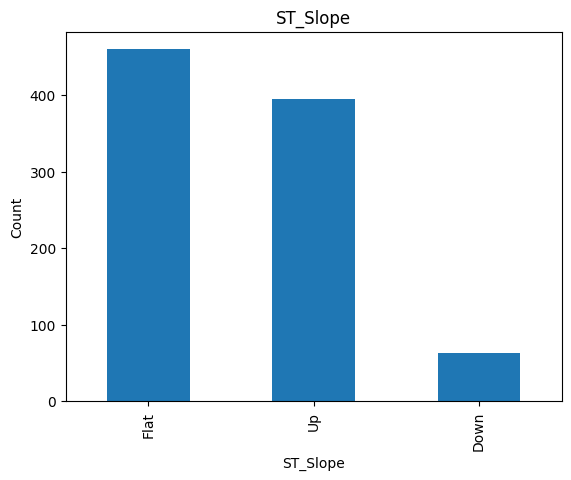

In [10]:
# menampilkan visualisasi distribusi setiap fitur kategorikal
for feature in categorical_feature:
    count = hearts[feature].value_counts()
    percent = 100 * hearts[feature].value_counts(normalize=True)
    df = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})

    print(f"\nFeature: {feature}")
    print(df)

    count.plot(kind='bar', title=feature)
    plt.ylabel("Count")
    plt.xlabel(feature)
    plt.show()

## Visualisasi Numerical Features



Setelah menganalisa visualisasi dalam fitur numerik, terlihat bahwa fitur RestingBP dan Cholesterol memiliki value 0 yang dimana ini merupakan kesalahan pencatatan dalam data.

Feature 'Age':
  - Rata-rata: 53.51
  - Median: 54.00
  - Standar deviasi: 9.43


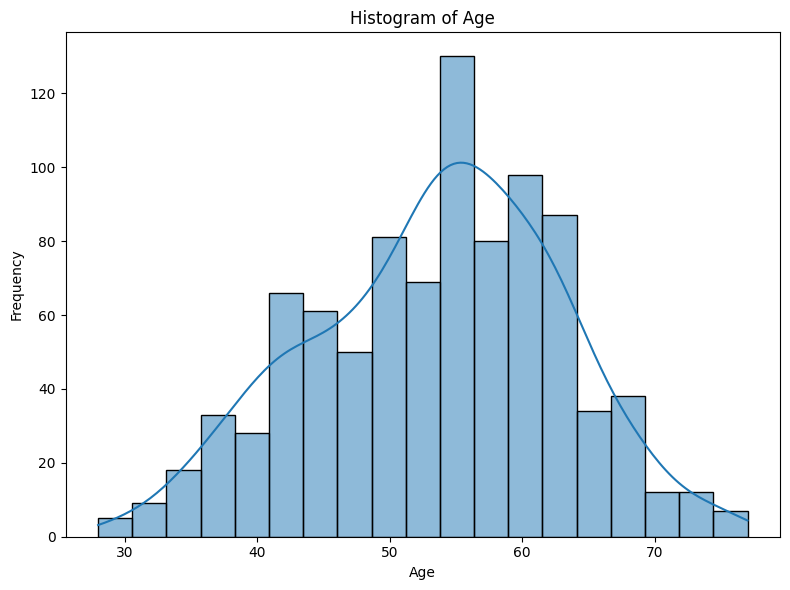

Feature 'RestingBP':
  - Rata-rata: 132.40
  - Median: 130.00
  - Standar deviasi: 18.51


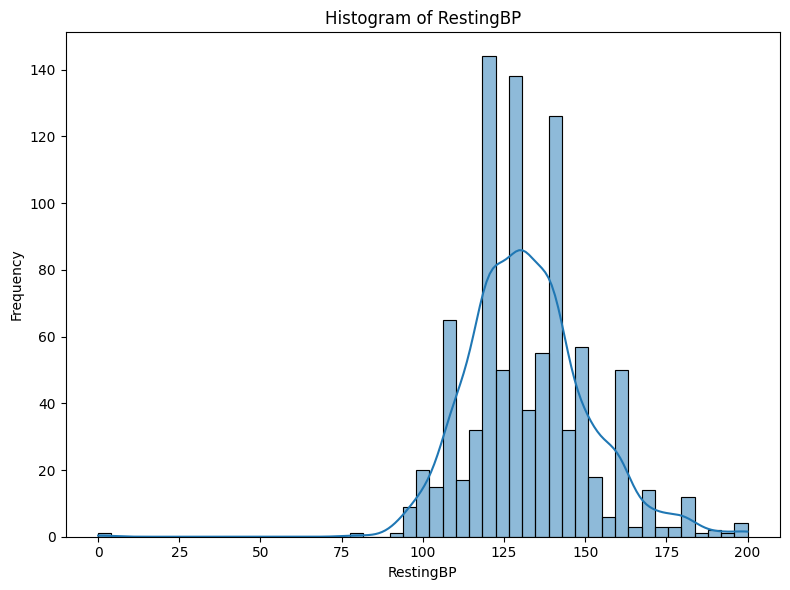

Feature 'Cholesterol':
  - Rata-rata: 198.80
  - Median: 223.00
  - Standar deviasi: 109.38


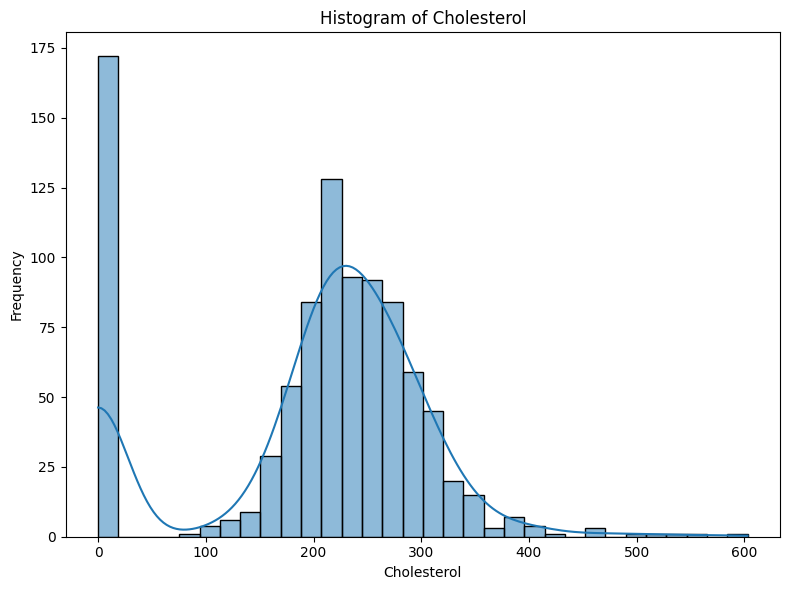

Feature 'MaxHR':
  - Rata-rata: 136.81
  - Median: 138.00
  - Standar deviasi: 25.46


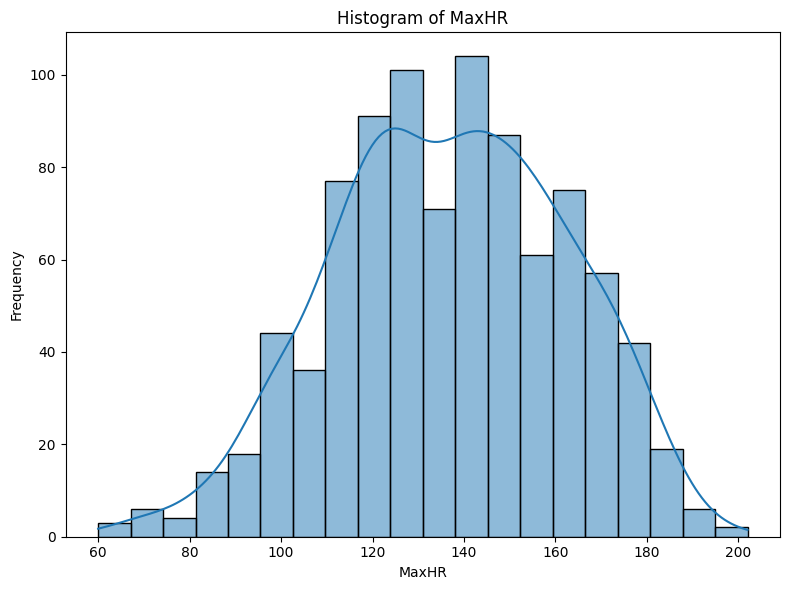

Feature 'Oldpeak':
  - Rata-rata: 0.89
  - Median: 0.60
  - Standar deviasi: 1.07


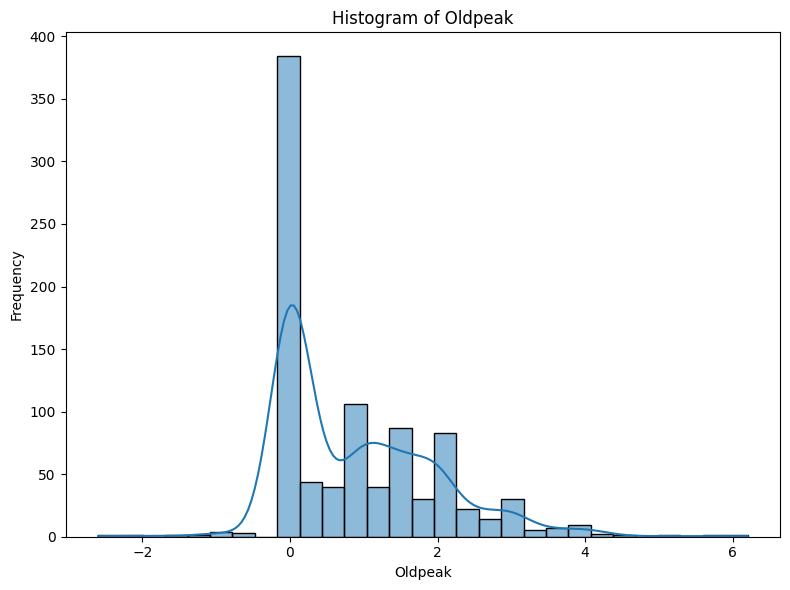

In [11]:
# Menampilkan histogram setiap fitur numerik
for feature in numerical_feature:
    # Menampilkan histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(hearts[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.tight_layout()

    mean_val = hearts[feature].mean()
    median_val = hearts[feature].median()
    std_dev = hearts[feature].std()
    print(f"Feature '{feature}':")
    print(f"  - Rata-rata: {mean_val:.2f}")
    print(f"  - Median: {median_val:.2f}")
    print(f"  - Standar deviasi: {std_dev:.2f}")


    plt.show()

# Data Pre-processing

## Menangani Value Tidak Valid

diketahui pada analisa data sebelumnya bahwa fitur RestingBP dan Cholesterol memiliki value 0 yang dimana data itu tidak valid

In [12]:
# Mengganti nilai 0 di RestingBP dan Cholesterol menjadi NaN
hearts['RestingBP'] = hearts['RestingBP'].replace(0, np.nan)
hearts['Cholesterol'] = hearts['Cholesterol'].replace(0, np.nan)

# Menampilkan missing value dari semua fitur
print(hearts.isnull().sum())

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64


In [13]:
# Mengubah nilai NaN di fitur RestingBP dan Cholesterol menjadi median
hearts['RestingBP'].fillna(hearts['RestingBP'].median(), inplace=True)
hearts['Cholesterol'].fillna(hearts['Cholesterol'].median(), inplace=True)

# Menampilkan missing value dari semua fitur setelah penggantian
print(hearts.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


<ipython-input-13-96561cb6e3b5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hearts['RestingBP'].fillna(hearts['RestingBP'].median(), inplace=True)
<ipython-input-13-96561cb6e3b5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

## Menangani Outlier

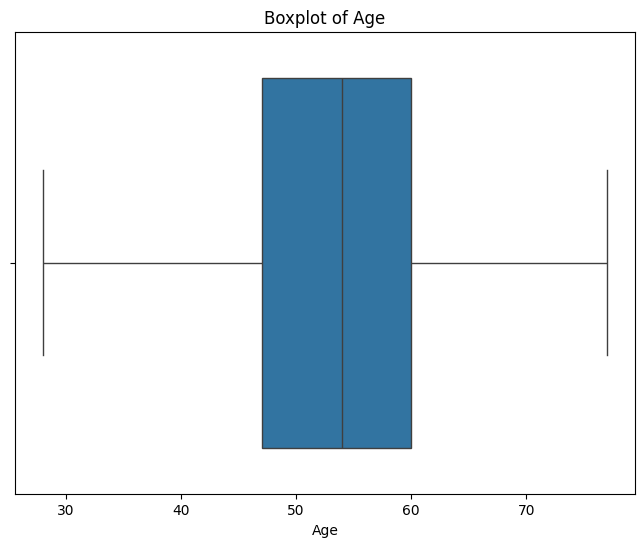

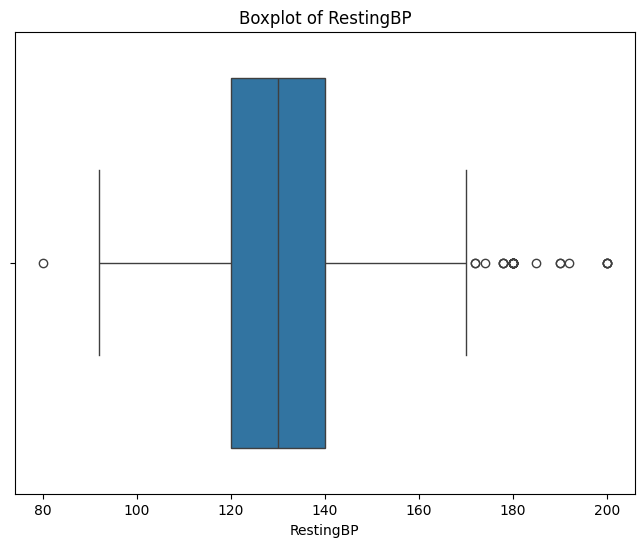

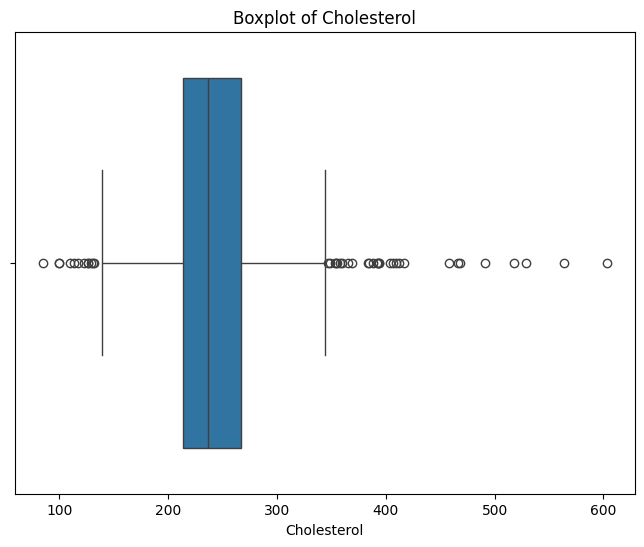

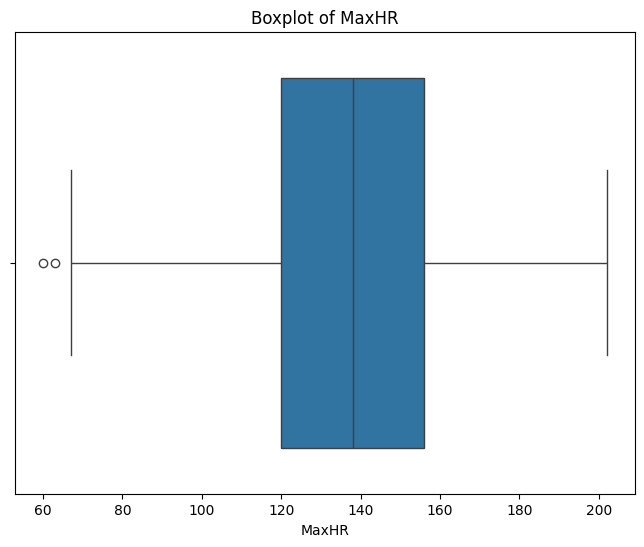

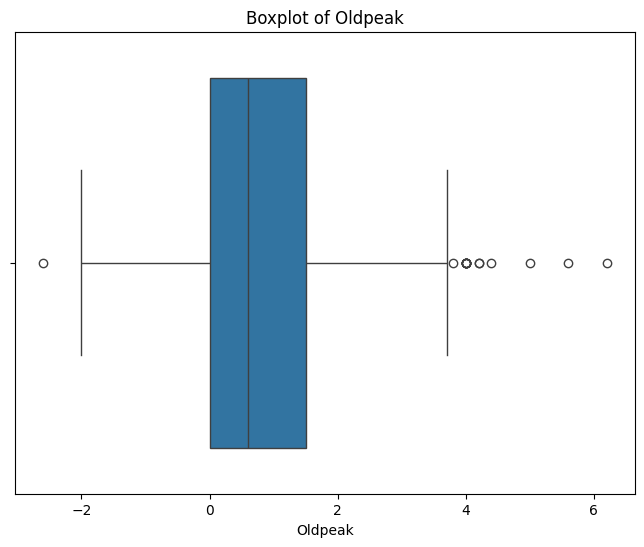

In [14]:
# Visualisasi Boxplot untuk mendeteksi outlier pada fitur numerik
for feature in numerical_feature:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=hearts[feature])
  plt.title(f"Boxplot of {feature}")
  plt.show()

In [15]:
# Fungsi untuk mendeteksi dan menangani outlier menggunakan IQR
def handle_outliers_iqr(df, feature):
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df[feature] = np.where(df[feature] < lower_bound, lower_bound, df[feature])
  df[feature] = np.where(df[feature] > upper_bound, upper_bound, df[feature])

  return df

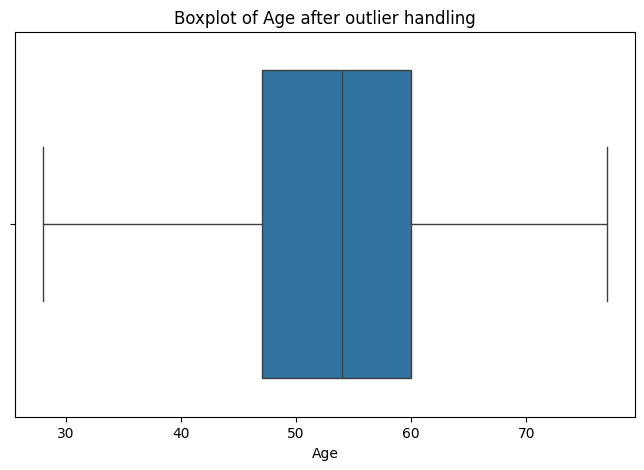

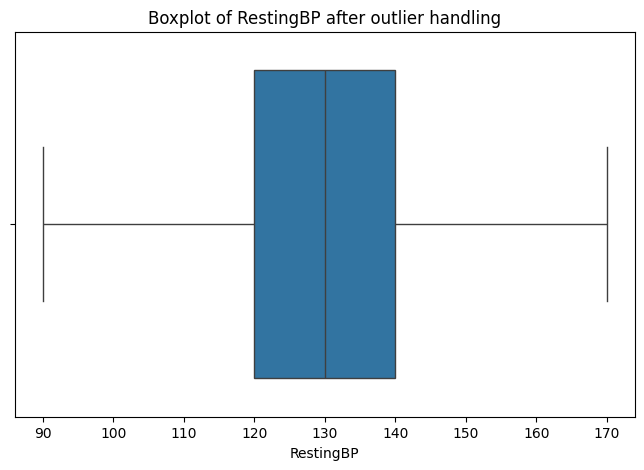

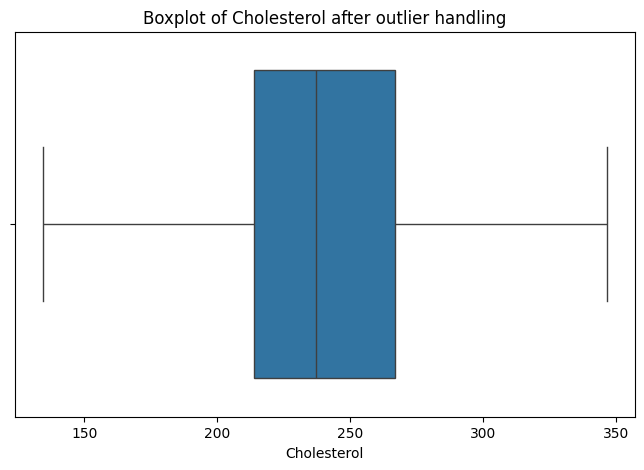

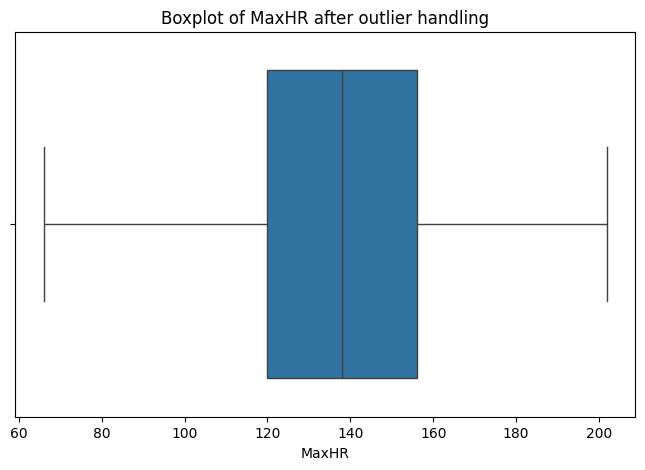

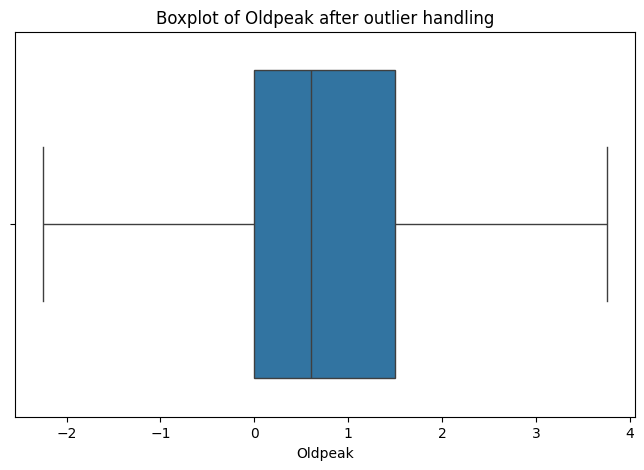

In [16]:
# Menangani outlier pada fitur numerik menggunakan IQR
for feature in numerical_feature:
  hearts = handle_outliers_iqr(hearts, feature)

# Menampilkan boxplot setelah penanganan outlier
for feature in numerical_feature:
  plt.figure(figsize=(8, 5))
  sns.boxplot(x=hearts[feature])
  plt.title(f"Boxplot of {feature} after outlier handling")
  plt.show()

## Data Splitting / Pemisahan
- membagi dataset menjadi 2 bagian, data test dan data latih

- menggunakan proporsi 80:20

In [17]:
# membagi dataset menjadi data test dan data latih
X = hearts.drop(["HeartDisease"],axis =1)
y = hearts["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [18]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 918
Total # of sample in train dataset: 734
Total # of sample in test dataset: 184


## One-Hot Encoding

- mengubah fitur kategorikal menjadi numerik yang bernilai 1 dan 0

- untuk mempercepat algoritma machine learning dalam memproses data

- menghilangkan fitur kategorikal setelah diencode

In [19]:
# Melakukan one-hot encoding untuk setiap fitur kategorikal dan menggabungkannya ke dalam dataframe
for feature in categorical_feature:
    X_train = pd.concat([X_train, pd.get_dummies(X_train[feature], prefix=feature)], axis=1)
    X_test = pd.concat([X_test, pd.get_dummies(X_test[feature], prefix=feature)], axis=1)

# Menghapus fitur kategorikal asli setelah di-encode
X_train.drop(categorical_feature, axis=1, inplace=True)
X_test.drop(categorical_feature, axis=1, inplace=True)

# Menampilkan hasil
X_train.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
660,58.0,140.0,211.0,165.0,0.0,False,True,False,False,True,...,False,True,True,False,False,True,False,False,False,True
426,56.0,126.0,166.0,140.0,0.0,False,True,False,True,False,...,True,False,False,False,True,True,False,False,False,True
338,63.0,140.0,237.0,149.0,2.0,False,True,True,False,False,...,False,True,True,False,False,True,False,False,False,True
151,48.0,100.0,159.0,100.0,0.0,False,True,False,True,False,...,True,False,False,True,False,True,False,False,False,True
542,54.0,138.0,274.0,105.0,1.5,True,False,True,False,False,...,True,False,False,True,False,False,True,False,True,False


## Standarisasi Data
- menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Sekitar 68% dari nilai akan berada di antara -1 dan 1.

- untuk mempercepat algoritma machine learning dalam memproses data

- hanya untuk data numerik

In [20]:
# Mendefinisikan dan menstandarisasi data latih serta data uji sekaligus
scaler = StandardScaler()

# Menstandarisasi data latih dan data uji tanpa menimbulkan data leakage
X_train[numerical_feature] = scaler.fit_transform(X_train[numerical_feature])
X_test[numerical_feature] = scaler.transform(X_test[numerical_feature])

X_train[numerical_feature].head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
660,0.496396,0.471957,-0.660102,1.090474,-0.853735
426,0.285847,-0.365231,-1.680349,0.096820,-0.853735
338,1.022767,0.471957,-0.070627,0.454536,1.053995
151,-0.556347,-1.920010,-1.839054,-1.493026,-0.853735
542,0.075298,0.352359,0.768243,-1.294295,0.577062


In [21]:
X_train[numerical_feature].describe().round(4)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,734.0000,734.0000,734.0000,734.0000,734.0000
mean,-0.0000,0.0000,0.0000,0.0000,-0.0000
std,1.0007,1.0007,1.0007,1.0007,1.0007
min,-2.6618,-2.5180,-2.3945,-2.8444,-2.9999
25%,-0.7669,-0.7240,-0.5921,-0.6981,-0.8537
50%,0.0753,-0.1260,-0.0706,0.0571,-0.2814
75%,0.7069,0.4720,0.5585,0.7725,0.5771
max,2.4966,2.2659,2.4120,2.5611,2.7233


# Model Development

## KNN (K-Nearest Neighbor)

- melatih model KNN

- menggunakan k = 10 tetangga

In [22]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

## Random Forest

- n_estimator: jumlah trees (pohon) di forest.

- max_depth: kedalaman atau panjang pohon. Ia merupakan ukuran seberapa banyak pohon dapat membelah (splitting).

- random_state: digunakan untuk mengontrol random number generator yang digunakan.

- n_jobs: jumlah job (pekerjaan) yang digunakan secara paralel. n_jobs=-1 artinya semua proses berjalan secara paralel.

In [23]:
RF = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, n_estimators=50, n_jobs=-1,
                       random_state=55)

# Evaluasi Model

In [24]:
# Melakukan prediksi pada data uji menggunakan model KNN dan Random Forest
knn_pred = knn.predict(X_test)
rf_pred = RF.predict(X_test)

In [25]:
# Menghitung akurasi model KNN
accuracy_knn = accuracy_score(y_test, knn_pred)
print("Akurasi KNN:", accuracy_knn)

# Menghitung akurasi model Random Forest
accuracy_rf = accuracy_score(y_test, rf_pred)
print("Akurasi Random Forest:", accuracy_rf)

Akurasi KNN: 0.8532608695652174
Akurasi Random Forest: 0.8641304347826086


In [26]:
# Membuat classification report untuk model KNN
print("Classification Report untuk KNN:")
print(classification_report(y_test, knn_pred))

# Membuat classification report untuk model Random Forest
print("Classification Report untuk Random Forest:")
print(classification_report(y_test, rf_pred))

Classification Report untuk KNN:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        81
           1       0.85      0.89      0.87       103

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Classification Report untuk Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.78      0.83        81
           1       0.84      0.93      0.88       103

    accuracy                           0.86       184
   macro avg       0.87      0.85      0.86       184
weighted avg       0.87      0.86      0.86       184

